# **Title: Datafun-04-Jupyter**

### **Author: Westley Vance**

### **Date: 5/17/24**

### Purpose: Project 4 uses a combination of Python and Markdown to create an initial data story in a Jupyter Notebook. The project includes a project virtual environment with popular libraries for data analytics including pandas, matplotlib, and seaborn, and introduces a common process for starting exploratory data analysis projects. The data being analyzed is from the ‘iris’ dataset.


## **Project**
### Imports:
##### The following code provides the imports for the project.

In [303]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading the data set:
##### This loads the iris data set and stores it as df. It then prints the head for the data set which consists of the first five entries from each column.

In [304]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Understanding the data set:
##### Prints the modified head, so the first 10 entries of each column, then the shape which is the number of (rows,columns), and lastly gives the data type of each column.

In [305]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### Descriptive statistics:
##### Provides the descriptive statistics of each column containing numeric data.

In [306]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### **Analysis:**
##### From the above information, we can see a few trends. We can see that the mean lengths are greater than the mean widths. We can also see that there is more variance in the lenghts than there is in the widths. As we move foward, we will look at the petal widths and lenghts specifically and see how those compare between species.

### Graphical analysis with histograms:
##### The first couple of lines creates two histograms one of the petal_length column data, and one of the petal_width. It then prints the two on top of eachother. The plt.show() command breaks the graphs appart. The second bit of code creates a histogram of each column value seperately and outputs them all together in a single image.

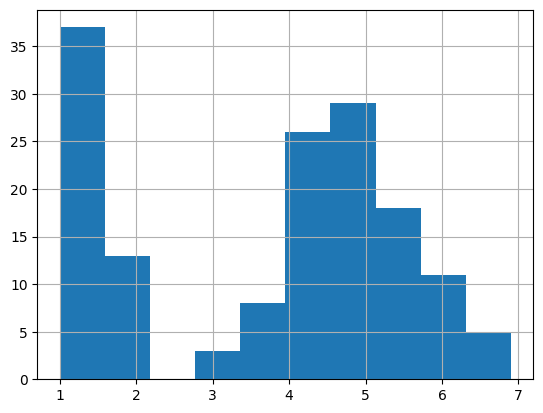

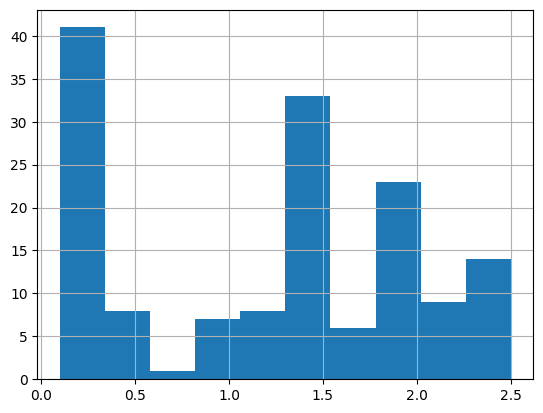

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

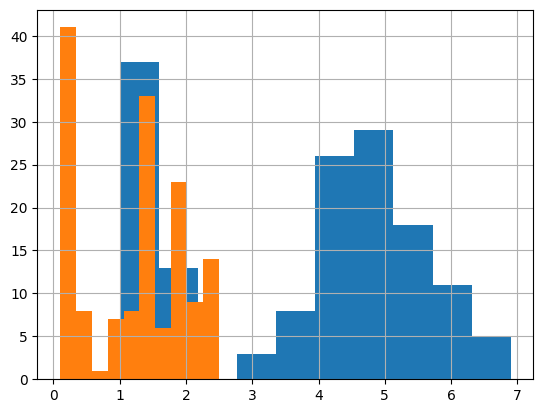

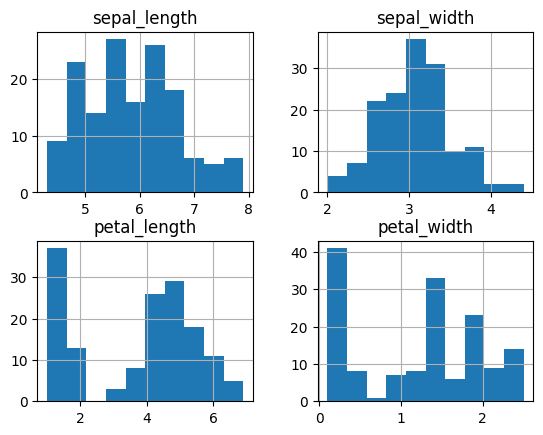

In [307]:
# Inspect histogram by numerical column
df['petal_length'].hist()
plt.show()
df['petal_width'].hist()
plt.show()
df['petal_length'].hist()
df['petal_width'].hist()

# Inspect histograms for all numerical columns
df.hist()

### **Analysis:**
##### From the above graphs, we can again see that the petal lenghts are greater with a larger variance than petal widths. Petal lengths are graph 1, petal widths are graph 2, and in the combined graph, petal width is the orange graph.

### Species data analysis:
##### The first line provides a count of each value type from the specified column value from the data file. The for loop creates a bar graph of the columns that contain either object data or category data. For this data set, that is the species column.

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


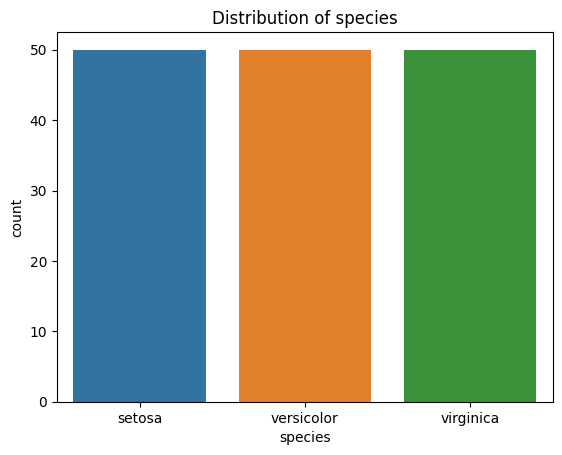

In [308]:
# Inspect value counts by categorical column
print(df['species'].value_counts())

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')


### **Analysis:**
##### From the above graph we can see that there is an even distribution of species in the data set. Each species represented in the set has 50 entries.

### Modifying the data:
##### This renames the species column to plant_Species to better understand the column information. It then modifies the values, converting presumed cm to inches. It then prints the head to show that they have been added.

In [309]:
# Renaming a column
df.rename(columns={'species': 'plant_Species'}, inplace=True)

# Adding a new column
df['petal_length_in'] = df['petal_length'] / 2.54
df['petal_width_in'] = df['petal_width'] / 2.54

#print the head and new column values
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width plant_Species  \
0           5.1          3.5           1.4          0.2        setosa   
1           4.9          3.0           1.4          0.2        setosa   
2           4.7          3.2           1.3          0.2        setosa   
3           4.6          3.1           1.5          0.2        setosa   
4           5.0          3.6           1.4          0.2        setosa   

   petal_length_in  petal_width_in  
0         0.551181         0.07874  
1         0.551181         0.07874  
2         0.511811         0.07874  
3         0.590551         0.07874  
4         0.551181         0.07874  


### Creating scatterplot to represent species treds:
##### This creates a scatter plot where the x value is the petal lenght, the y value is petal width and the hue or key is the plant_Species. The code then modifies the x and y axis labels and the title of the plot. Data is shown in inches

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

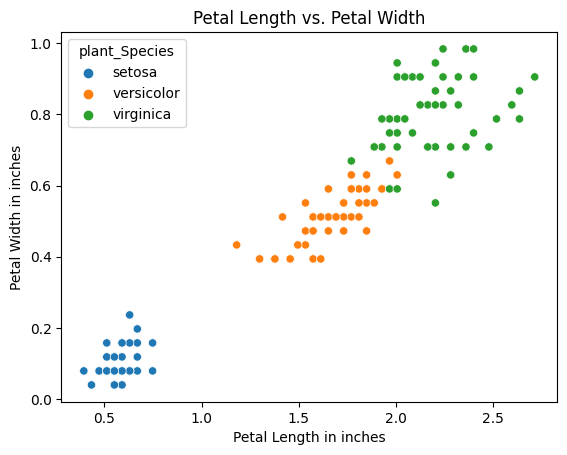

In [310]:
plt = sns.scatterplot(data=df, x="petal_length_in", y="petal_width_in", hue="plant_Species")

# Set axis labels and chart title
plt.set_xlabel("Petal Length in inches")
plt.set_ylabel("Petal Width in inches")
plt.set_title("Petal Length vs. Petal Width")

# Show the plot (This actually causes an error)
#plt.show()

### **Final Analysis:**
##### From the above information and graphs we can get an idea of how the petal lengths and widths correlate between species. It is clear that in all species observed in this data set, the petal width is less than the petal length. This is clear by observing the means and standard deviations as well as observing the data graphically. In addition to this, we can clearly see that petal size varies between species. We can see that the Setosa has the smallest petal, where the virginica has the largest. Further information about these plants could be gained by looking at other characteristics of the associated species.